<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение-и-проверка-модели" data-toc-modified-id="Обучение-и-проверка-модели-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение и проверка модели</a></span><ul class="toc-item"><li><span><a href="#Подготовка-выборок" data-toc-modified-id="Подготовка-выборок-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подготовка выборок</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучение модели</a></span></li><li><span><a href="#Плучение-предсказаний" data-toc-modified-id="Плучение-предсказаний-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Плучение предсказаний</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span></li><li><span><a href="#Расчёт-прибыли-и-рисков" data-toc-modified-id="Расчёт-прибыли-и-рисков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Расчёт прибыли и рисков</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Выбор локации для скважины

**Иcходные данные**

Добывающей компании нужно решить, где бурить новую скважину.

Нам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. 

**Цель исследования**

Построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

Проанализировать возможную прибыль и риски техникой *Bootstrap.*


**Ход исследования**

1. Обзор и подготовка данных.    
2. Обучение и проверка моделей.
3. Рассчет прибыли.
4. Просчет рисков и прибыли.

Шаги для выбора локации:

- В избранном регионе ищем месторождения, для каждого определяем значения признаков;
- Строим модель и оцениваем объём запасов;
- Выбираем месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Импорт библиотек

In [672]:
import pandas as pd
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Обзор данных

In [673]:
for i in range(3):
    pth1 = 'geo_data_' + str(i) + '.csv'
    pth2 = '/datasets/geo_data_' + str(i) + '.csv'
    if os.path.exists(pth1):
        globals()['geo_data_' + str(i)] = pd.read_csv(pth1, index_col=0)
    elif os.path.exists(pth2):
        globals()['geo_data_' + str(i)] = pd.read_csv(pth2, index_col=0)
    else:
        print('Что-то пошло не так :(')

Посмотрим данные.

In [674]:
df_list = {'Регион 1': geo_data_0, 'Регион 2': geo_data_1, 'Регион 3': geo_data_2}

for name, df in df_list.items():
    print(name)
    print(df.info())
    display(df.head())
    print()

Регион 1
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, txEyH to 1CWhH
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
id,,,,
txEyH,0.705745,-0.497823,1.221170,105.280062
2acmU,1.334711,-0.340164,4.365080,73.037750
409Wp,1.022732,0.151990,1.419926,85.265647
iJLyR,-0.032172,0.139033,2.978566,168.620776
Xdl7t,1.988431,0.155413,4.751769,154.036647



Регион 2
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, kBEdx to relB0
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
id,,,,
kBEdx,-15.001348,-8.276000,-0.005876,3.179103
62mP7,14.272088,-3.475083,0.999183,26.953261
vyE1P,6.263187,-5.948386,5.001160,134.766305
KcrkZ,-13.081196,-11.506057,4.999415,137.945408
AHL4O,12.702195,-8.147433,5.004363,134.766305



Регион 3
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, fwXo0 to V9kWn
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
id,,,,
fwXo0,-1.146987,0.963328,-0.828965,27.758673
WJtFt,0.262778,0.269839,-2.530187,56.069697
ovLUW,0.194587,0.289035,-5.586433,62.871910
q6cA6,2.236060,-0.553760,0.930038,114.572842
WPMUX,-0.515993,1.716266,5.899011,149.600746


Согласно документации к данным, каждая таблица соответствует определенному региону. Всего регионов 3. 

Названия колонок отражают следующую информацию:
* `id` — уникальный идентификатор скважины;
* `f0, f1, f2` — три признака точек (неважно, что они означают, но сами признаки значимы);
* `product` — объём запасов в скважине (тыс. баррелей).

Целевым признаком явлется `product`.

Из обзор данных видно, что:
* Для каждого региона имеем данные о 100 000 месторождений.
* Заголовки столбцов соответствуют стилю.
* Отсутствуют пропуски в данных.
* Отсутствуют категориальные признаки.

Необходимо проверить данные на дублекаты. Аномалии обнаружить вряд ли удастся, так как нет информации о нормах значений.

### Предобработка данных

Проверим данные на дубликаты.

In [675]:
for name, df in df_list.items():
    print('Дублекатов в таблице:', name)
    print(df.duplicated().sum())

Дублекатов в таблице: Регион 1
0
Дублекатов в таблице: Регион 2
0
Дублекатов в таблице: Регион 3
0


Проверим на дублекаты идентификаторы.

In [676]:
for name, df in df_list.items():
    print('Дублекатов индексов в таблице:', name)
    print(df.index.duplicated().sum())

Дублекатов индексов в таблице: Регион 1
10
Дублекатов индексов в таблице: Регион 2
4
Дублекатов индексов в таблице: Регион 3
4


В таблицах присутсвуют дублекаты индексов. Необходимо их обработать. Сначала посмотрим на строки с дублирующимеся id.

In [653]:
for name, df in df_list.items():
    print('Дублекаты индексов в таблице:', name)
    dupl_ind_list = df[df.index.duplicated()].index
    display(df.loc[dupl_ind_list])

Дублекаты индексов в таблице: Регион 1


,f0,f1,f2,product
id,,,,
HZww2,0.755284,0.368511,1.863211,30.681774
HZww2,1.061194,-0.373969,10.430210,158.828695
bxg6G,0.411645,0.856830,-3.653440,73.604260
bxg6G,-0.823752,0.546319,3.630479,93.007798
A5aEY,-0.039949,0.156872,0.209861,89.249364
A5aEY,-0.180335,0.935548,-2.094773,33.020205
QcMuo,0.506563,-0.323775,-2.215583,75.496502
QcMuo,0.635635,-0.473422,0.862670,64.578675
74z30,0.741456,0.459229,5.153109,140.771492


Дублекаты индексов в таблице: Регион 2


,f0,f1,f2,product
id,,,,
LHZR0,11.170835,-1.945066,3.002872,80.859783
LHZR0,-8.989672,-4.286607,2.009139,57.085625
bfPNe,-9.494442,-5.463692,4.006042,110.992147
bfPNe,-6.202799,-4.820045,2.995107,84.038886
wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
wt4Uk,10.259972,-9.376355,4.994297,134.766305
5ltQ6,-3.435401,-12.296043,1.999796,57.085625
5ltQ6,18.213839,2.191999,3.993869,107.813044


Дублекаты индексов в таблице: Регион 3


,f0,f1,f2,product
id,,,,
xCHr8,1.633027,0.368135,-2.378367,6.120525
xCHr8,-0.847066,2.101796,5.597130,184.388641
VF7Jo,2.122656,-0.858275,5.746001,181.716817
VF7Jo,-0.883115,0.560537,0.723601,136.233420
KUPhW,0.231846,-1.698941,4.990775,11.716299
KUPhW,1.211150,3.176408,5.543540,132.831802
Vcm5J,-1.229484,-2.439204,1.222909,137.968290
Vcm5J,2.587702,1.986875,2.482245,92.327572


Итого мы имеем список объектов с одинаковым id, но очень разными характеристиками. 
Данные объекты мы можем либо удалить полностью, либо успеднить значения по строк идентификатору. Усреднение может ухудшить модель, если какая-то из строк (или они обе) недостоверны. При удалении мы потеряем несущественную часть данных (максимум 10 из 25000). Удалим строки с дублирующимися идентификаторами.

In [654]:
for name, df in df_list.items():
    dupl_ind_list = df[df.index.duplicated()].index
    df.drop(index=dupl_ind_list, inplace=True)
    print(f'Дублекаты индексов в таблице {name} после обработки:')
    display(df[df.index.duplicated()])
    print('Объектов в таблице:', df.shape[0])
    print()

Дублекаты индексов в таблице Регион 1 после обработки:


,f0,f1,f2,product
id,,,,


Объектов в таблице: 99980

Дублекаты индексов в таблице Регион 2 после обработки:


,f0,f1,f2,product
id,,,,


Объектов в таблице: 99992

Дублекаты индексов в таблице Регион 3 после обработки:


,f0,f1,f2,product
id,,,,


Объектов в таблице: 99992



Дубликаты устранены. Можно приступать к работе с моделью.

## Обучение и проверка модели

1. Разобьем данные на обучающую и валидационную выборки в соотношении 75:25.
2. Обучим модель и сделаем предсказания на валидационной выборке.
3. Сохраним предсказания и правильные ответы на валидационной выборке.
4. Напечатаем на экране средний запас предсказанного сырья и RMSE модели.
5. Проанализируем результаты.

### Подготовка выборок

Подготовим выборки для каждого региона.

In [655]:
# разделим данные на признаки и целевой признак
numb = 0
for df in df_list.values():
    globals()['features_geo_data_' + str(numb)] = df.drop('product', axis=1)
    globals()['target_geo_data_' + str(numb)] = df['product']
    numb += 1

In [656]:
# разделим данные на обучающие и валидационные выборки в соотношении 75/25
features_list = [features_geo_data_0, features_geo_data_1, features_geo_data_2]
target_list = [target_geo_data_0, target_geo_data_1, target_geo_data_2]

for i in range(3):
    globals()['train_features_geo_data_' + str(i)], globals()['valid_features_geo_data_' + str(i)], globals()['train_target_geo_data_' + str(i)], globals()['valid_target_geo_data_' + str(i)] = train_test_split(
        features_list[i], target_list[i], test_size=0.25, random_state=12345)

In [657]:
#убедимся, что удалось отделить 75% данных для каждой тренировочной выборки 
train_features_list = [train_features_geo_data_0, train_features_geo_data_1, train_features_geo_data_2]
valid_features_list = [valid_features_geo_data_0, valid_features_geo_data_1, valid_features_geo_data_2]

for i in range(3):
    share_test = round(len(train_features_list[i]) / len(features_list[i]), 2)
    share_valid = round(len(valid_features_list[i]) / len(features_list[i]), 2)
    print(f'Доля значений тестовой выборки от общей для региона №{i+1} составдяет {share_test:.0%}')
    print(f'Доля значений валидационной выборки от общей для региона №{i+1} составдяет {share_valid:.0%}')
    print()

Доля значений тестовой выборки от общей для региона №1 составдяет 75%
Доля значений валидационной выборки от общей для региона №1 составдяет 25%

Доля значений тестовой выборки от общей для региона №2 составдяет 75%
Доля значений валидационной выборки от общей для региона №2 составдяет 25%

Доля значений тестовой выборки от общей для региона №3 составдяет 75%
Доля значений валидационной выборки от общей для региона №3 составдяет 25%



In [658]:
# создадим также списки с целевыми признаками
train_target_list = [train_target_geo_data_0, train_target_geo_data_1, train_target_geo_data_2]
valid_target_list = [valid_target_geo_data_0, valid_target_geo_data_1, valid_target_geo_data_2]

### Обучение модели

Cоздадим и обучим 3 модели.

In [659]:
# создадим и обучим 3 модели
for i in range(3):
    globals()['model_' + str(i)] = LinearRegression().fit(train_features_list[i], train_target_list[i])
    
# создадим список моделей
models = [model_0, model_1, model_2]

### Плучение предсказаний

Получим предсказания моделей для каждого региона.

In [660]:
# сделаем предсказания
for i in range(3):
    globals()['model_' + str(i) + '_prediction'] = models[i].predict(valid_features_list[i])
    
# создадим список предсказаний на валидационной выбрке
models_predictions = [model_0_prediction, model_1_prediction, model_2_prediction]

# переведем массив предсказаний на валидационной выбрке в Series и сохраним индексацию
for i in range(3):
    models_predictions[i] = pd.Series(models_predictions[i])
    models_predictions[i].index = valid_features_list[i].index

In [678]:
# рассчитаем и распечатем RMSE и средний запас предсказанного сырья на валидационной выборке для каждой модели
for i in range(3):        
    globals()['prediction_mean_' + str(i)] = models_predictions[i].mean()
    globals()['rmse_' + str(i)] = mean_squared_error(valid_target_list[i], models_predictions[i], squared=False)
    
prediction_mean_list = [prediction_mean_0, prediction_mean_1, prediction_mean_2]
rmse_list = [rmse_0, rmse_1, rmse_2]
    
for i in range(3):
    print(f'Модель Региона №{i+1}.')    
    print(f'Средний запас предсказанного сырья: {round(prediction_mean_list[i], 2)} тыс. баррелей')
    print(f'RMSE предсказаний:{round(rmse_list[i], 2)} тыс. баррелей')
    print()

Модель Региона №1.
Средний запас предсказанного сырья: 92.42 тыс. баррелей
RMSE предсказаний:37.72 тыс. баррелей

Модель Региона №2.
Средний запас предсказанного сырья: 68.98 тыс. баррелей
RMSE предсказаний:0.89 тыс. баррелей

Модель Региона №3.
Средний запас предсказанного сырья: 95.12 тыс. баррелей
RMSE предсказаний:39.98 тыс. баррелей



Добавим данные с минимальным и максимальным возможным средним объемом для каждой точки.

In [679]:
for i in range(3):
    print(f'Регион №{i+1}.')
    print(f'Средний запас предсказанного сырья от {round((prediction_mean_list[i] - rmse_list[i]), 2)} до {round((prediction_mean_list[i] + rmse_list[i]), 2)} тыс. баррелей')
    print()

Регион №1.
Средний запас предсказанного сырья от 54.71 до 130.14 тыс. баррелей

Регион №2.
Средний запас предсказанного сырья от 68.09 до 69.87 тыс. баррелей

Регион №3.
Средний запас предсказанного сырья от 55.14 до 135.09 тыс. баррелей



### Вывод

Наибольший запас предсказанного сырья в Регионе №3. Однако и ошибка модели там самая большая. Для Регионов №1 и №3 ошибка состовляет более 1/3 среднего предсказанного объема сырья.

Наименее рискованным по предсказаниям модели выглядит по Регион №2.

## Подготовка к расчёту прибыли

Сохраним в отдельных переменных ключевые значения для расчётов.

In [664]:
BUDGET = 10000000000
UNIT_INCOME = 450000
EXP_COUNT = 200
RESEARCH_COUNT = 500

Рассчитаем достаточный для безубыточной работы объем сырья в регионе.

In [665]:
min_product_to_region = BUDGET / UNIT_INCOME
mean_product_to_field = min_product_to_region / EXP_COUNT

print(f'Для безубыточной работы в регионе дольжно быть {min_product_to_region:.2f} тыс. баррелей на 200 выбранных точек. Или в среднем {mean_product_to_field:.2f} тыс. баррелей на каждое из 200 месторождений.')

Для безубыточной работы в регионе дольжно быть 22222.22 тыс. баррелей на 200 выбранных точек. Или в среднем 111.11 тыс. баррелей на каждое из 200 месторождений.


В среднем, на одно из 200 лучших предсказанных лучших месторождений должно приходиться 111.11 тыс. баррелей, что больше, чем среднее предсказанное для 10000 месторождений по каждому региону. Однако, если мы возьмем лучшие 200 точек, скорее всего, сможем получить необходимый объем.

## Расчёт прибыли и рисков 

Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели. Нам нужно определить 200 лучших месторождений в каждом регионе.

Сравним с реальной прибылью для данных регионов, проверив по целевому признаку валидационной выборки.

In [680]:
def revenue(predictions, target):
    predictions = predictions.reset_index(drop=True)
    target = target.reset_index(drop=True)
    pred_sort = predictions.sort_values(ascending=False)
    best_pred = pred_sort[:EXP_COUNT]
    target_for_best_pred = target[best_pred.index]
#     if len(target_for_best_pred) != 200:
#         print(len(target_for_best_pred)   
    best_pred_revenue = best_pred.sum() * UNIT_INCOME - BUDGET
    target_for_best_pred_revenue = target_for_best_pred.sum() * UNIT_INCOME - BUDGET
    return best_pred_revenue, target_for_best_pred_revenue

for i in range(3):
    print(f'Предсказанная прибыль для Региона №{i+1}: {(revenue(models_predictions[i], valid_target_list[i]))[0]:0.2f}')
    print(f'Реальная прибыль для Региона №{i+1}: {(revenue(models_predictions[i], valid_target_list[i]))[1]:0.2f}')
    print()

Предсказанная прибыль для Региона №1: 3861955668.66
Реальная прибыль для Региона №1: 3136026056.66

Предсказанная прибыль для Региона №2: 2485099308.42
Реальная прибыль для Региона №2: 2415086696.68

Предсказанная прибыль для Региона №3: 3495040761.74
Реальная прибыль для Региона №3: 2465945792.01



Посчитаем риски и прибыль для каждого региона, применив технику Bootstrap.

In [689]:
state = np.random.RandomState(12345)

for k in range(3):
    globals()['bootstrap_predict_' + str(k)] = []
    globals()['bootstrap_target_' + str(k)] = []
    for i in range(1000):
        sub_valid_target = valid_target_list[k].sample(n=RESEARCH_COUNT, random_state=state, replace=True)
        subpred = models_predictions[k][sub_valid_target.index]
        subrevenue_pred = revenue(subpred, sub_valid_target)[0]
        subrevenue_target = revenue(subpred, sub_valid_target)[1]
        globals()['bootstrap_predict_' + str(k)].append(subrevenue_pred)
        globals()['bootstrap_target_' + str(k)].append(subrevenue_target)

Посторим распределения.

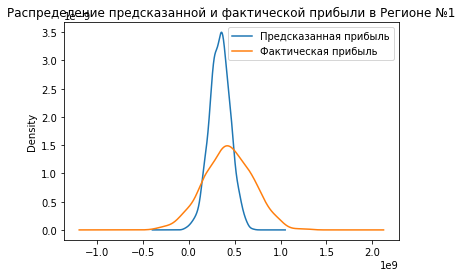

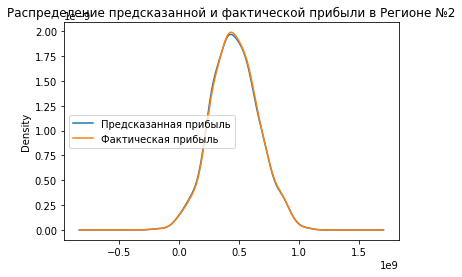

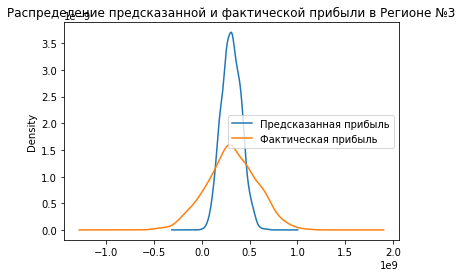

In [685]:
bootstrap_predicts = [bootstrap_predict_0, bootstrap_predict_1, bootstrap_predict_2]
bootstrap_targets = [bootstrap_target_0, bootstrap_target_1, bootstrap_target_2]

for i in range(3):
    bootstrap_predicts[i] = pd.Series(bootstrap_predicts[i])
    bootstrap_targets[i] = pd.Series(bootstrap_targets[i])
    bootstrap_predicts[i].plot.kde()
    bootstrap_targets[i].plot.kde()
    plt.legend(['Предсказанная прибыль', 'Фактическая прибыль'])
    plt.title(label=f'Распределение предсказанной и фактической прибыли в Регионе №{i+1}')
    plt.show()
    print()

Определим для каждого региона:
* Среднюю прибыль.
* 95%-й доверительный интервал.
* Риск убытков.

In [686]:
# расчет средней прибыли
for i in range(3):
    print(f'Средняя предсказанная прибыль для Региона №{i+1}: {bootstrap_predicts[i].mean()}')
    print(f'Средняя фактическая прибыль для Региона №{i+1}: {bootstrap_targets[i].mean()}')
    print()

Средняя предсказанная прибыль для Региона №1: 339059038.77662987
Средняя фактическая прибыль для Региона №1: 431538186.5834927

Средняя предсказанная прибыль для Региона №2: 462356020.5416042
Средняя фактическая прибыль для Региона №2: 465108803.2734029

Средняя предсказанная прибыль для Региона №3: 309148851.2736959
Средняя фактическая прибыль для Региона №3: 312996093.49173546



In [687]:
# расчет 95%-ого доверительного интервала
for i in range(3):
    lower_pred = bootstrap_predicts[i].quantile(0.025)
    upper_pred = bootstrap_predicts[i].quantile(0.975)
    lower_target = bootstrap_targets[i].quantile(0.025)
    upper_target = bootstrap_targets[i].quantile(0.975)
    print(f'95%-й доверительный интервал по предсказанным данным для Региона №{i+1}: от {lower_pred:.0f} до {upper_pred:.0f}')
    print(f'95%-й доверительный интервал по фактическим данным для Региона №{i+1}: от {lower_target:.0f} до {upper_target:.0f}')
    print()

95%-й доверительный интервал по предсказанным данным для Региона №1: от 114052664 до 558644111
95%-й доверительный интервал по фактическим данным для Региона №1: от -80924627 до 941037638

95%-й доверительный интервал по предсказанным данным для Региона №2: от 79320771 до 865839170
95%-й доверительный интервал по фактическим данным для Региона №2: от 80299335 до 864399761

95%-й доверительный интервал по предсказанным данным для Региона №3: от 120705072 до 512408454
95%-й доверительный интервал по фактическим данным для Региона №3: от -195063387 до 809242512



Определим вероятность уйти в минус по прибыли для каждого региона.

In [688]:
for i in range(3):
    pred_loss = (bootstrap_predicts[i] < 0).sum()
    prob_pred_loss = pred_loss / bootstrap_predicts[i].shape[0]
    target_loss = (bootstrap_targets[i] < 0).sum()
    prob_target_loss = target_loss / bootstrap_targets[i].shape[0]
    print(f'Вероятность убытков по предсказанным данным для Региона №{i+1} составляет {prob_pred_loss:.2%}')
    print(f'Вероятность убытков по фактическим данным для Региона №{i+1} составляет {prob_target_loss:.2%}')
    print()

Вероятность убытков по предсказанным данным для Региона №1 составляет 0.20%
Вероятность убытков по фактическим данным для Региона №1 составляет 5.50%

Вероятность убытков по предсказанным данным для Региона №2 составляет 0.70%
Вероятность убытков по фактическим данным для Региона №2 составляет 0.80%

Вероятность убытков по предсказанным данным для Региона №3 составляет 0.00%
Вероятность убытков по фактическим данным для Региона №3 составляет 11.70%



## Вывод

Мы построили 3 модели для предсказания прибыли в 3 регионах разработки. Согласно предсказаниям модели наибольшие средние запасы находятся в Регионе 3, чуть меньше в Регионе 1, на последнем месте с большой разницей Регион 2. Однако средняя ошибка моделей в предсказаниях для регионов 1 и 3 равна примерно 1/3 от средних значений. Для Региона 2 ошибка минимальна.

После отбора 200 лучших месторождений по предсказаниям моделей в каждом регионе, максимальные средние (и предсказанная и фактическая) прибыли были получены для Региона 1, несколько ниже для Региона 3, самая низкая для Региона 2. Важно отметить, что для Регионов 1 и 3 модели завышают среднюю предсказанную прибыль примерно на 7-10 млд., для Региона 2 - на 7 млн., что на порядок меньше.

Применение техники Bootstrap позволило посмотеть распределение при увеличении числа регионов каждого типа до 1000 наибольшая (и предсказанная и фактическая) средняя прибыль получена по Региону 2. 

С 95% вероятностью прибыль для каждого региона лежит в интеравлах:
1. Регион №1: 
    * предсказанная: от 114052664 до 558644111
    * фактическая: от -80924627 до 941037638


2. Регион №2: 
    * предсказанная: от 79320771 до 865839170
    * фактическая: от 80299335 до 864399761
    

3. Регион №3:
    * предсказанная: от 120705072 до 512408454
    * фактическая: от -195063387 до 809242512
    
Оценка рисков показала, вероятность убытков:
1. Регион №1:
    * предсказанная: 0.20%
    * фактическая: 5.50%
2. Регион №2:
    * предсказанная: 0.70%
    * фактическая: 0.80%
3. Регион №3:
    * предсказанная: 0.00%
    * фактическая: 11.70%
    
Таким образом получаем, что для Региона 2 риск убытка находиться на самом низком уровне.

Учитывая все вышеизложенное, для исследования новых регионов и последующей разработки скорее стоит рассматривать Регион 2, так как ошибка модели самая низкая, при этом при увеличении выборки видно, что прибыль в других Регионах ниже.